In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
# from sklearn.preprocessing import LabelEncoder
# from sklearn.utils import compute_class_weight

In [8]:
# Parameters of the Axelrod model
L_values = [32]  # size of the grid
F_values = [3]  # number of features
q = 43  # number of traits per feature

# Parameter for the noise
noise = [0.01]  # probability of random cultural drift

# Parameter for the mass media influence
media = [0.01]  # probability of adopting the global culture

In [9]:
def initialize_culture_grid(L, F, q):
    """
    Initialize the culture grid.

    Parameters:
        L (int): size of the grid
        F (int): number of features
        q (int): number of traits per feature

    Returns:
        np.array: the culture grid
    """
    return np.random.randint(q, size=(L, L, F))

def calculate_global_culture(culture_grid):
    """
    Calculate the most common culture in the culture grid.

    Parameters:
        culture_grid (np.array): the culture grid

    Returns:
        np.array: the most common culture
    """
    L, _, F = culture_grid.shape
    culture_int = np.sum(culture_grid * (q ** np.arange(F)), axis=2)
    unique_vals, counts = np.unique(culture_int, return_counts=True)
    most_common_culture_int = unique_vals[np.argmax(counts)]
    most_common_culture = np.zeros(F)
    for i in range(F-1, -1, -1):
        most_common_culture[i] = most_common_culture_int % q
        most_common_culture_int //= q
    return most_common_culture

def simulation_step(culture_grid, L):
    """
    Perform a simulation step.

    Parameters:
        culture_grid (np.array): the culture grid
        L (int): size of the grid
        F (int): number of features
        q (int): number of traits per feature

    Returns:
        np.array: the updated culture grid
    """
    # Randomly select an agent
    x, y = np.random.randint(L, size=2)

    # Randomly select a neighbor
    dx, dy = np.random.choice([-1, 0, 1], size=2)
    nx, ny = (x + dx) % L, (y + dy) % L  # periodic boundary conditions

    # If they share at least one cultural feature
    if any(culture_grid[x, y, :] == culture_grid[nx, ny, :]):
        # The agent adopts one differing feature from the neighbor
        differing_features = np.where(culture_grid[x, y, :] != culture_grid[nx, ny, :])[0]
        if len(differing_features) > 0:
            f = np.random.choice(differing_features)
            culture_grid[x, y, f] = culture_grid[nx, ny, f]

    return culture_grid

def simulation_step_with_noise(culture_grid, L, noise):
    """
    Perform a simulation step with noise.

    Parameters:
        culture_grid (np.array): the culture grid
        L (int): size of the grid
        F (int): number of features
        q (int): number of traits per feature
        noise (float): probability of random cultural drift

    Returns:
        np.array: the updated culture grid
    """
    # Perform a normal simulation step
    simulation_step(culture_grid, L)

    # With a small probability, an agent randomly changes one of its features
    if np.random.rand() < noise:
        x, y = np.random.randint(L, size=2)
        f = np.random.randint(F)
        culture_grid[x, y, f] = np.random.randint(q)

    return culture_grid

def simulation_step_with_noise_and_media(culture_grid, L, media):
    """
    Perform a simulation step with noise and media influence.

    Parameters:
        culture_grid (np.array): the culture grid
        L (int): size of the grid
        F (int): number of features
        q (int): number of traits per feature
        noise (float): probability of random cultural drift
        media (float): probability of adopting the global culture

    Returns:
        np.array: the updated culture grid
    """
    # The global culture
    global_culture = calculate_global_culture(culture_grid)

    # Perform a simulation step with noise
    simulation_step_with_noise(culture_grid, L)

    # With a small probability, an agent adopts the global culture
    if np.random.rand() < media:
        x, y = np.random.randint(L, size=2)
        culture_grid[x, y, :] = global_culture

    return culture_grid

def calculate_Smax_norm(culture_grid):
    """
    Calculate the size of the largest homogeneous domain (Smax).

    Parameters:
        culture_grid (np.array): the culture grid

    Returns:
        int: Smax value
    """
    L, _, F = culture_grid.shape
    culture_int = np.sum(culture_grid * (q ** np.arange(F)), axis=2)
    unique_vals, counts = np.unique(culture_int, return_counts=True)
    max_count = np.max(counts)
    Smax_norm = max_count / (L ** 2)

    return Smax_norm

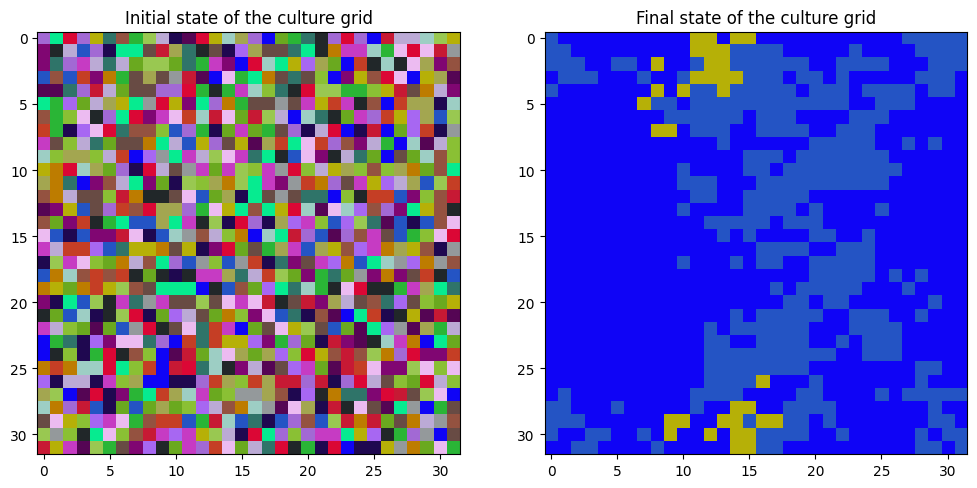

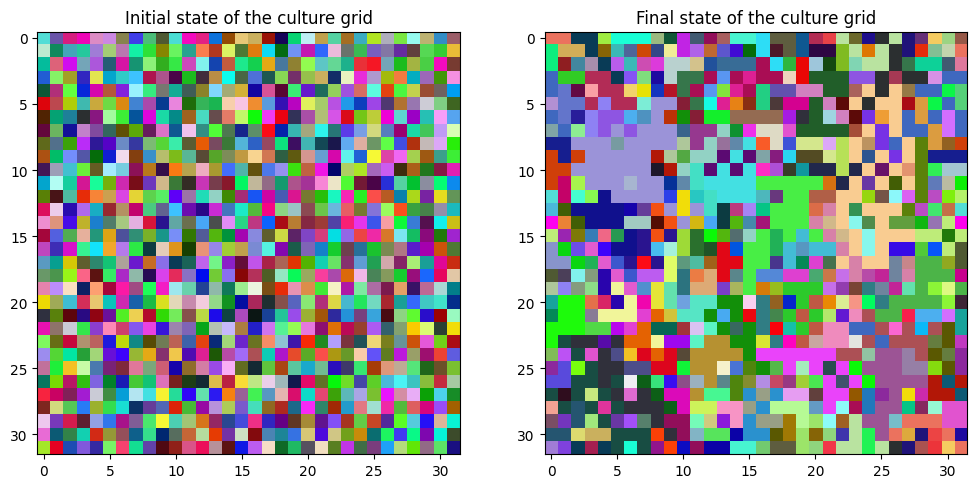

In [15]:
Smax_norm = []
q_values = range(3, q, 20)
Smax_final_dict = {}

for L in L_values:

    Smax_final = []  # Svuota la lista all'inizio di ogni iterazione su L

    for F in F_values:

        for n in q_values:

            # Initialize the culture grid
            culture_grid = initialize_culture_grid(L, F, n)

            # Compute a unique integer for each possible culture
            culture_integers = np.sum(culture_grid * (n ** np.arange(F)), axis=2)

            # Generate a random colormap
            cmap = colors.ListedColormap(np.random.rand(n**F, 3))

            # Create a figure with two subplots
            fig, axs = plt.subplots(1, 2, figsize=(12, 6))

            # Visualize the initial state of the culture grid
            axs[0].imshow(culture_integers, cmap=cmap)
            axs[0].set_title('Initial state of the culture grid')

            # Start the simulation
            for _ in range(1000000):
                culture_grid = simulation_step(culture_grid, L)
                T = calculate_Smax_norm(culture_grid)/(L**2)
                Smax_norm.append(T)

            SF = np.max(Smax_norm)
            Smax_final.append(SF)

            # Re-compute a unique integer for each possible culture
            culture_integers = np.sum(culture_grid * (q ** np.arange(F)), axis=2)

            # Visualize the final state of the culture grid
            axs[1].imshow(culture_integers, cmap=cmap)
            axs[1].set_title('Final state of the culture grid')

        Smax_final_dict[L] = Smax_final

plt.show()

In [ ]:
L = 50
F = 3
q = 400
q_values = range(3, q+1)
Smax_final = []

for n in q_values:
    Smax_norm = []
    culture_grid = initialize_culture_grid(L, F, n)
    # culture_integers = np.sum(culture_grid * (n ** np.arange(F)), axis=2)
    for _ in range(100000):
        culture_grid = simulation_step(culture_grid, L)
        T = calculate_Smax_norm(culture_grid)/(L**2)
        Smax_norm.append(T)
    SF = np.max(Smax_norm)
    Smax_final.append(SF)

In [ ]:
# Creazione del grafico
plt.plot(q_values, Smax_final)
plt.xlabel('q')
plt.ylabel('Smax_norm')
plt.title('Variazione di Smax_norm rispetto a q')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

F = 3
q = 100
q_values = range(3, q+1)
Smax_final_dict = {}

for L in L_values:
    Smax_final = []  # Svuota la lista all'inizio di ogni iterazione su L
    for n in q_values:
        Smax_norm = []
        culture_grid = initialize_culture_grid(L, F, n)
        for _ in range(10000):
            culture_grid = simulation_step(culture_grid, L)
            T = calculate_Smax_norm(culture_grid) / (L ** 2)
            Smax_norm.append(T)
        SF = np.max(Smax_norm)
        Smax_final.append(SF)
    Smax_final_dict[L] = Smax_final

# Creazione dei grafici
for L, Smax_final in Smax_final_dict.items():
    plt.plot(list(q_values), Smax_final, label=f"L = {L}")  # Converto q_values in una lista

plt.xlabel('q')
plt.ylabel('Smax')
plt.title('Variazione di Smax in relazione a q per ogni L')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
L = 50
F = 3
q = 400
q_values = range(3, q+1)
Smax_final = []


Smax_norm = []
culture_grid = initialize_culture_grid(L, F, n)
# culture_integers = np.sum(culture_grid * (n ** np.arange(F)), axis=2)
for _ in range(100):
     culture_grid = simulation_step(culture_grid, L)
     T = calculate_Smax_norm(culture_grid)/(L**2)
     Smax_norm.append(T)
SF = np.max(Smax_norm)
Smax_final.append(SF)

# Creazione del grafico
plt.plot(q_values, Smax_final)
plt.xlabel('q')
plt.ylabel('Smax_norm')
plt.title('Variazione di Smax_norm rispetto a q')
plt.grid(True)
plt.show()